# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [95]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
dataset = list(lines)[1:]
for i in range(len(dataset)):
    dataset[i] = [float(x) for x in dataset[i]]
dataset = np.array(dataset)
print(dataset)
print(len(dataset))
print(dataset.shape)

[[1.250000e+05 2.001000e+03 4.000000e+01 1.371110e+03]
 [1.500000e+05 2.001000e+03 4.000000e+01 1.298700e+03]
 [5.000000e+03 2.001000e+03 6.000000e+01 1.232430e+03]
 ...
 [2.000000e+04 2.015000e+03 2.600000e+02 4.949238e+04]
 [1.000000e+04 2.015000e+03 3.000000e+02 3.854269e+04]
 [2.000000e+04 2.015000e+03 3.000000e+02 3.968332e+04]]
1297
(1297, 4)


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [96]:
# linear regression with linregress (estimate price from year)

year = dataset[:,1]
price = dataset[:,3]
slope1,intercept1,rvalue1,_,_ = stats.linregress(year,price)

In [ ]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# your code.....

In [ ]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

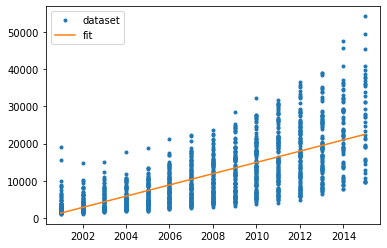

In [91]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

plt.plot(year,price,'.',label='dataset')
plt.plot(year,intercept1+slope1*year,label='fit')
plt.legend()
plt.savefig('linreg_pricefromyear.jpg',dpi=480)

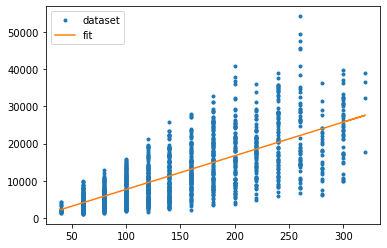

In [97]:
# linear regression with linregress (estimate price from power)

power = dataset[:,2]
price = dataset[:,3]
slope2,intercept2,rvalue2,_,_ = stats.linregress(power,price)

plt.plot(power,price,'.',label='dataset')
plt.plot(power,intercept2+slope2*power,label='fit')
plt.legend()
plt.savefig('linreg_pricefrompower.jpg',dpi=480)

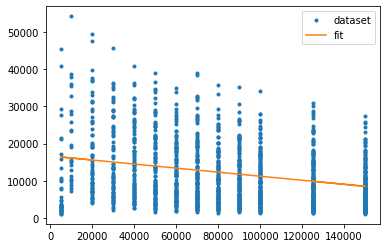

In [98]:
# linear regression with linregress (estimate price from km)

km = dataset[:,0]
price = dataset[:,3]
slope3,intercept3,rvalue3,_,_ = stats.linregress(km,price)

plt.plot(km,price,'.',label='dataset')
plt.plot(km,intercept3+slope3*km,label='fit')
plt.legend()
plt.savefig('linreg_pricefromkm.jpg',dpi=480)

In [59]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print(rvalue1,rvalue2,rvalue3)

0.6767043169095365 0.7085500315263955 -0.2572867429988502


,km,year,powerPS,avgPrice
0,125000,2001,40,1371.11
1,150000,2001,40,1298.70
2,5000,2001,60,1232.43
3,50000,2001,60,1733.89
4,60000,2001,60,1985.24
...,...,...,...,...
1292,5000,2015,260,45277.18
1293,10000,2015,260,54156.28
1294,20000,2015,260,49492.38
1295,10000,2015,300,38542.69


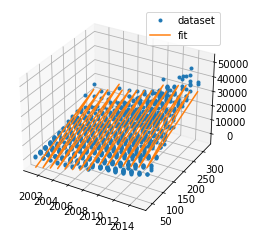

In [107]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)

import pandas as pd
from matplotlib.ticker import MaxNLocator

dataset = pd.read_csv(filename)
display(dataset)
year_power = dataset[['year','powerPS']]
price = dataset['avgPrice']
linreg = linear_model.LinearRegression()
linreg.fit(year_power,price)
slopes = linreg.coef_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(year_power['year'],year_power['powerPS'],price,'.',label='dataset')
ax.plot(year_power['year'],year_power['powerPS'],linreg.intercept_+slopes[0]*year_power['year']+slopes[1]*year_power['powerPS'],label='fit')
plt.legend()
plt.savefig('linreg_pricefromyearpower.jpg',dpi=480)